<a href="https://colab.research.google.com/github/tarikul12/cvpr/blob/main/Image_Resizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original image width: 472
Original image height: 591
Enter the operation (resize, crop, compress, bulk_resize, meme_generator, color_picker, rotate, flip): compress
Enter the current compression percentage (1-100): 30
Original compression percentage: 30
Enter the new compression percentage (1-100): 69


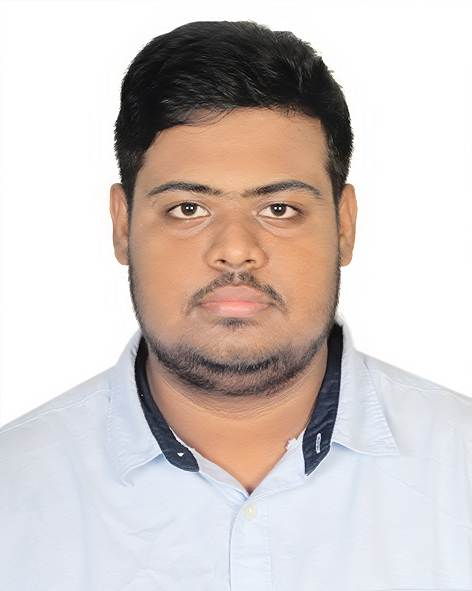

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

def image_processing(image, operation, **kwargs):
    if operation == "resize":
        # Resize the image
        width = int(input("Enter the new width: "))
        height = int(input("Enter the new height: "))
        resized_image = cv2.resize(image, (width, height))
        return resized_image
    elif operation == "crop":
        # Crop the image using width and height
        width = int(input("Enter the width of the cropped region: "))
        height = int(input("Enter the height of the cropped region: "))
        cropped_image = image[:height, :width]
        return cropped_image
    elif operation == "compress":
        # Display the original compression percentage
        print("Original compression percentage:", kwargs.get('compression_percentage', 100))

        # Update the compression percentage based on user input
        new_compression_percentage = int(input("Enter the new compression percentage (1-100): "))
        if new_compression_percentage < 1:
            new_compression_percentage = 1
        elif new_compression_percentage > 100:
            new_compression_percentage = 100

        _, compressed_image = cv2.imencode('.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, new_compression_percentage])
        return cv2.imdecode(compressed_image, 1)
    elif operation == "bulk_resize":
        # Bulk resize images
        width = int(input("Enter the new width for resizing: "))
        height = int(input("Enter the new height for resizing: "))
        resized_images = [cv2.resize(img, (width, height)) for img in image]

        # Convert resized images into MB format
        mb_resized_images = [cv2.imencode('.jpg', img)[1].tobytes() for img in resized_images]
        mb_sizes = [len(img) / (1024 * 1024) for img in mb_resized_images]
        return mb_resized_images, mb_sizes
    elif operation == "meme_generator":
        # Meme generation
        top_text = input("Enter the text for the top of the meme: ")
        bottom_text = input("Enter the text for the bottom of the meme: ")
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_thickness = 2
        text_size_top = cv2.getTextSize(top_text, font, font_scale, font_thickness)[0]
        text_size_bottom = cv2.getTextSize(bottom_text, font, font_scale, font_thickness)[0]
        text_x_top = (image.shape[1] - text_size_top[0]) // 2
        text_x_bottom = (image.shape[1] - text_size_bottom[0]) // 2
        text_y_top = text_size_top[1] + 10
        text_y_bottom = image.shape[0] - 10
        meme_image = cv2.putText(image.copy(), top_text, (text_x_top, text_y_top), font, font_scale, (255, 255, 255), font_thickness)
        meme_image = cv2.putText(meme_image, bottom_text, (text_x_bottom, text_y_bottom), font, font_scale, (255, 255, 255), font_thickness)
        return meme_image
    elif operation == "color_picker":
        # Color picker
        x, y = kwargs.get('coordinates', (0, 0))
        color = image[y, x]
        return color
    elif operation == "rotate":
        # Rotate the image
        angle = float(input("Enter the angle of rotation in degrees: "))
        rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        return rotated_image
    elif operation == "flip":
        # Flip the image
        flip_code = int(input("Enter the flip code (0 for vertical flip, 1 for horizontal flip): "))
        flipped_image = cv2.flip(image, flip_code)
        return flipped_image
    else:
        print("Invalid operation")

# Example usage
image = cv2.imread("/content/drive/MyDrive/NISHAT/Tarikul picture.jpg")

# Display the width and height of the original image
print("Original image width:", image.shape[1])
print("Original image height:", image.shape[0])

# Perform image processing based on user input
operation = input("Enter the operation (resize, crop, compress, bulk_resize, meme_generator, color_picker, rotate, flip): ")
if operation == "compress":
    # For compression, provide the original compression percentage
    compression_percentage = int(input("Enter the current compression percentage (1-100): "))
    processed_image = image_processing(image, operation, compression_percentage=compression_percentage)
elif operation == "bulk_resize":
    processed_images, mb_sizes = image_processing([image], operation)
    for idx, img in enumerate(processed_images):
        print(f"Resized image {idx + 1} size: {mb_sizes[idx]:.2f} MB")
else:
    processed_image = image_processing(image, operation)

# Display the processed image
if operation == "bulk_resize":
    for idx, img in enumerate(processed_images):
        print(f"Resized image {idx + 1} size: {mb_sizes[idx]:.2f} MB")
else:
    cv2_imshow(processed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
